# Tarea - Caminata aleatoria y simulación montecarlo

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D (Puede ver el archivo de Ejemplo 3D).

In [11]:
import random
import numpy as np

In [16]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style

def movimiento(w0,n): 
    w=[w0]
    x=[1,-1]
    for i in range(n):
        valor=random.choice(x)
        w.append(w[-1]+valor*np.sqrt(0.001))
    return w

### Aquí se agregaron los datos en array, cada uno en una variable diferente (x,y,z), para posteriormente mostrar el gráfico

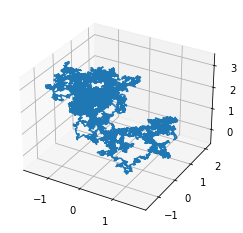

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

x1 = np.array(movimiento(0,10000))
y1 = np.array(movimiento(0,10000))
z1 = np.array(movimiento(0,10000))

plt.plot(x1,y1,z1)

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

### Definir variables y condiciones

In [61]:
import numpy as np
import random

In [65]:
moneda=[1,-1] 
def juego():
    m = random.choice(moneda)
    win = True
    if m != 1:
        win =False
    return win

In [78]:
def opciones(c):
    if c[-1] >= 6:
        apuesta = c[-1]/2
    else:
        apuesta = 2
    return apuesta

In [79]:
def jugador(a0): 
    a = [a0] 
    while a[-1] >= 2 :
        apuesta = opciones_apuesta(a)
        ganaste = juego()
        if ganaste:    
            a.append(a[-1] + apuesta)
        else:
            a.append(a[-1] - apuesta)
    return a

 ### A continuación, una gráfica del capital hasta llegar a la apuesta mínima, que en este caso es 2.

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

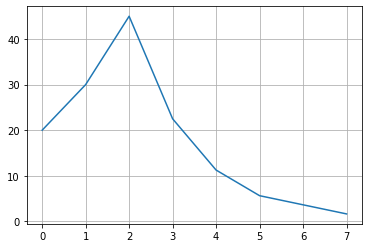

In [81]:
plt.figure()
plt.plot(jugador(20))
plt.grid()

### Cuando 10,000 apostadores participan, el número de volados para quedar en la quiebra es:

In [82]:
numero_juegos = []
for i in range(10000):
    apuesta = jugador(20)
    numero_juegos.append(len(apuesta))
print("Como no existen los decimales al tirar, un aprox sería: ", round(np.mean(numero_juegos)), "tiros")
print("Los tiros promedio para quedar en la quiebra son: ", np.mean(numero_juegos))

Como no existen los decimales al tirar, un aprox sería:  20 tiros
Los tiros promedio para quedar en la quiebra son:  19.6546


### Histograma

(array([8.177e+03, 1.372e+03, 3.310e+02, 7.100e+01, 3.200e+01, 1.100e+01,
        3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([  5. ,  29.8,  54.6,  79.4, 104.2, 129. , 153.8, 178.6, 203.4,
        228.2, 253. ]),
 <BarContainer object of 10 artists>)

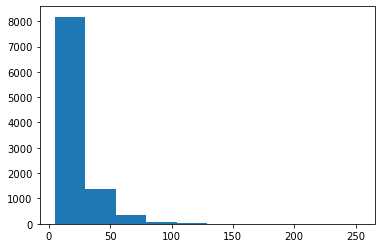

In [83]:
plt.hist(numero_juegos)